In [1]:
import json
import numpy as np
from statsmodels.regression.linear_model import OLS
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.preprocessing import StandardScaler as Standardize

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split

C:\Users\gujianflsgj\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
theDf =  pd.read_csv('[dataFinal]/_housingPriceZillowMergeFinal.csv')

In [3]:
print theDf.columns.values
print theDf.shape

['pixelPlant' 'pixelPole' 'pixelLake' 'pixelRoad' 'pixelGrass' 'pixelWall'
 'pixelCar' 'propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver'
 'pixelBus' 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'pixelFence'
 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson' 'pixelTree'
 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk' 'pixelGround'
 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelSign'
 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'longitude' 'latitude' 'bathrooms'
 'last_sold_price' 'zestimate_amount' 'prices' 'property_size' 'zip'
 'zestimate_valuation_range_high' 'long' 'tax_year'
 'zestimate_value_change' 'status' 'zestimate_percentile' 'bedrooms'
 'zestimate_last_updated' 'zillow_id' 'address' 'lat' 'last_sold_date'
 'tax_value' 'zillow' 'year_built' 'zestimate_valuationRange_low'
 'graph_data_link' 'home_size' 'home_detail_link' 'home_type' 'property'
 'map_this_home_link']
(727, 68)


In [4]:
for col in theDf.columns:
    print col,theDf[col].dtype

pixelPlant float64
pixelPole float64
pixelLake float64
pixelRoad float64
pixelGrass float64
pixelWall float64
pixelCar float64
propertiesAsses int64
pixelSea float64
numCraigslistHouse int64
pixelRiver float64
pixelBus float64
pixelCeiling float64
pixelPath float64
pixelBuilding float64
crime int64
pixelFence int64
walkSchool int64
walkMbta int64
energySiteEUI float64
pixelPerson float64
pixelTree float64
pixelVan float64
walkPark int64
walkUniversity int64
pixelSidewalk float64
pixelGround int64
pixelMountain float64
pixelPalmTree float64
pixelHouse float64
pixelBridge float64
pixelSign float64
pixelRailing float64
pixelField float64
pixelWindow float64
pixelGrandstand float64
numCraigslistRoom int64
pixelSky float64
longitude float64
latitude float64
bathrooms float64
last_sold_price float64
zestimate_amount float64
prices object
property_size float64
zip int64
zestimate_valuation_range_high float64
long float64
tax_year float64
zestimate_value_change float64
status object
zestimate_

In [5]:
theDf

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,tax_value,zillow,year_built,zestimate_valuationRange_low,graph_data_link,home_size,home_detail_link,home_type,property,map_this_home_link
0,0.0,0.017,41.950,7.542,0.000,0.920,1.177,47174046,0.00,0,...,NaN,0,NaN,728068.0,NaN,1400.0,http://www.zillow.com/homedetails/321-Dorchest...,Condominium,0,http://www.zillow.com/homes/2096497652_zpid/
1,0.0,0.597,40.600,1.570,0.000,0.025,9.659,12937000,0.00,0,...,499300.0,0,1885.0,692745.0,http://www.zillow.com/homedetails/54-Grampian-...,2423.0,http://www.zillow.com/homedetails/54-Grampian-...,SingleFamily,0,http://www.zillow.com/homes/59113320_zpid/
2,0.0,0.127,12.480,3.140,0.000,0.427,2.555,4294268,0.00,0,...,NaN,0,2016.0,695682.0,NaN,2800.0,http://www.zillow.com/homedetails/129-Gardner-...,SingleFamily,0,http://www.zillow.com/homes/2096677074_zpid/
3,0.0,0.000,0.000,0.000,0.000,0.000,0.000,15601537,0.00,0,...,NaN,0,1925.0,458252.0,NaN,1260.0,http://www.zillow.com/homedetails/7-9-Herberts...,Condominium,0,http://www.zillow.com/homes/2096675064_zpid/
4,0.0,0.055,13.330,2.205,0.000,0.049,8.027,17314700,0.00,0,...,448800.0,0,1900.0,665224.0,http://www.zillow.com/homedetails/31-Maple-St-...,1847.0,http://www.zillow.com/homedetails/31-Maple-St-...,SingleFamily,0,http://www.zillow.com/homes/59155302_zpid/
5,0.0,0.024,48.580,10.960,0.000,0.001,0.979,46937627,0.00,0,...,509100.0,0,2006.0,743110.0,http://www.zillow.com/homedetails/255-Northamp...,1057.0,http://www.zillow.com/homedetails/255-Northamp...,Condominium,0,http://www.zillow.com/homes/87796106_zpid/
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,22309790,0.00,0,...,183100.0,0,1910.0,326026.0,http://www.zillow.com/homedetails/43-Parkvale-...,578.0,http://www.zillow.com/homedetails/43-Parkvale-...,Condominium,0,http://www.zillow.com/homes/59088144_zpid/
7,0.0,0.007,29.690,4.235,0.000,0.227,4.437,9218020,0.00,0,...,NaN,0,1920.0,254898.0,NaN,1000.0,http://www.zillow.com/homedetails/53-Torrey-St...,Condominium,0,http://www.zillow.com/homes/2096823174_zpid/
8,0.0,0.000,15.240,0.086,0.000,0.001,0.440,10421920,0.00,0,...,NaN,0,1900.0,438629.0,NaN,1400.0,http://www.zillow.com/homedetails/31-Houghton-...,Condominium,0,http://www.zillow.com/homes/2096881020_zpid/
9,0.0,0.000,51.390,2.535,0.000,0.044,6.958,12327400,0.00,0,...,156300.0,0,1991.0,252014.0,http://www.zillow.com/homedetails/10-Arbutus-S...,1520.0,http://www.zillow.com/homedetails/10-Arbutus-S...,SingleFamily,0,http://www.zillow.com/homes/59102139_zpid/


In [6]:
# price values listed as string with a commoa inside, which is 
#theDf['prices'].replace(regex=True,inplace=True,to_replace=r',',value=r'')

#pd.to_numeric(theDf['prices'],errors='raise')
data = theDf.convert_objects(convert_numeric=True)
data.head()

C:\Users\gujianflsgj\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,tax_value,zillow,year_built,zestimate_valuationRange_low,graph_data_link,home_size,home_detail_link,home_type,property,map_this_home_link
0,0.0,0.017,41.95,7.542,0.0,0.920,1.177,47174046,0.0,0,...,NaN,0,NaN,728068.0,NaN,1400.0,http://www.zillow.com/homedetails/321-Dorchest...,Condominium,0,http://www.zillow.com/homes/2096497652_zpid/
1,0.0,0.597,40.60,1.570,0.0,0.025,9.659,12937000,0.0,0,...,499300.0,0,1885.0,692745.0,http://www.zillow.com/homedetails/54-Grampian-...,2423.0,http://www.zillow.com/homedetails/54-Grampian-...,SingleFamily,0,http://www.zillow.com/homes/59113320_zpid/
2,0.0,0.127,12.48,3.140,0.0,0.427,2.555,4294268,0.0,0,...,NaN,0,2016.0,695682.0,NaN,2800.0,http://www.zillow.com/homedetails/129-Gardner-...,SingleFamily,0,http://www.zillow.com/homes/2096677074_zpid/
3,0.0,0.000,0.00,0.000,0.0,0.000,0.000,15601537,0.0,0,...,NaN,0,1925.0,458252.0,NaN,1260.0,http://www.zillow.com/homedetails/7-9-Herberts...,Condominium,0,http://www.zillow.com/homes/2096675064_zpid/
4,0.0,0.055,13.33,2.205,0.0,0.049,8.027,17314700,0.0,0,...,448800.0,0,1900.0,665224.0,http://www.zillow.com/homedetails/31-Maple-St-...,1847.0,http://www.zillow.com/homedetails/31-Maple-St-...,SingleFamily,0,http://www.zillow.com/homes/59155302_zpid/


In [7]:
### dropping useless or repeated information
zestimate = pd.concat([data['zestimate_amount'],data['zestimate_valuation_range_high'],data['zestimate_valuationRange_low'],data['zestimate_value_change'],data['zestimate_percentile']],axis=1)
data = data.drop('graph_data_link',axis = 1) 
data = data.drop('home_detail_link',axis = 1) 
data = data.drop('map_this_home_link',axis = 1)
data = data.drop('zestimate_last_updated',axis = 1)
data = data.drop('propertiesAsses',axis = 1)
data = data.drop('zestimate_amount',axis = 1)
data = data.drop('zestimate_valuation_range_high',axis = 1)
data = data.drop('zestimate_valuationRange_low',axis = 1)
data = data.drop('zestimate_value_change',axis = 1)
data = data.drop('zestimate_percentile',axis = 1)
data = data.drop('address',axis = 1)
data = data.drop('tax_value',1)
data = data.drop('tax_year',1)
data = data.drop('lat',1)
data = data.drop('long',1)
data = data.drop('zillow',1)
data = data.drop('property',1)
print data.shape
data.head()

(727, 51)


,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,pixelSea,numCraigslistHouse,pixelRiver,...,prices,property_size,zip,status,bedrooms,zillow_id,last_sold_date,year_built,home_size,home_type
0,0.0,0.017,41.95,7.542,0.0,0.920,1.177,0.0,0,0.000,...,849000.0,NaN,2127,Condo For Sale,4.0,2096497652,NaN,NaN,1400.0,Condominium
1,0.0,0.597,40.60,1.570,0.0,0.025,9.659,0.0,0,0.000,...,899000.0,6534.0,2125,House For Sale,5.0,59113320,12/11/1998,1885.0,2423.0,SingleFamily
2,0.0,0.127,12.48,3.140,0.0,0.427,2.555,0.0,0,0.004,...,849000.0,6969.0,2132,House For Sale,4.0,2096677074,NaN,2016.0,2800.0,SingleFamily
3,0.0,0.000,0.00,0.000,0.0,0.000,0.000,0.0,0,0.000,...,529000.0,9999.0,2130,Condo For Sale,3.0,2096675064,NaN,1925.0,1260.0,Condominium
4,0.0,0.055,13.33,2.205,0.0,0.049,8.027,0.0,0,0.210,...,739900.0,4356.0,2132,House For Sale,3.0,59155302,NaN,1900.0,1847.0,SingleFamily


In [8]:
data.columns 


Index([u'pixelPlant', u'pixelPole', u'pixelLake', u'pixelRoad', u'pixelGrass',
       u'pixelWall', u'pixelCar', u'pixelSea', u'numCraigslistHouse',
       u'pixelRiver', u'pixelBus', u'pixelCeiling', u'pixelPath',
       u'pixelBuilding', u'crime', u'pixelFence', u'walkSchool', u'walkMbta',
       u'energySiteEUI', u'pixelPerson', u'pixelTree', u'pixelVan',
       u'walkPark', u'walkUniversity', u'pixelSidewalk', u'pixelGround',
       u'pixelMountain', u'pixelPalmTree', u'pixelHouse', u'pixelBridge',
       u'pixelSign', u'pixelRailing', u'pixelField', u'pixelWindow',
       u'pixelGrandstand', u'numCraigslistRoom', u'pixelSky', u'longitude',
       u'latitude', u'bathrooms', u'last_sold_price', u'prices',
       u'property_size', u'zip', u'status', u'bedrooms', u'zillow_id',
       u'last_sold_date', u'year_built', u'home_size', u'home_type'],
      dtype='object')

In [9]:
ID = data['zillow_id'].copy()  #recourding test data ID for future output
data = data.drop('zillow_id',axis=1)

In [10]:
data['last_sold_price'] = data['last_sold_price'].isnull()
data = data.drop('last_sold_date',1)

In [11]:
#base cleaning for missing value 
data = data.replace('None',np.nan)
data.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,pixelSea,numCraigslistHouse,pixelRiver,...,bathrooms,last_sold_price,prices,property_size,zip,status,bedrooms,year_built,home_size,home_type
0,0.0,0.017,41.95,7.542,0.0,0.920,1.177,0.0,0,0.000,...,2.0,True,849000.0,NaN,2127,Condo For Sale,4.0,NaN,1400.0,Condominium
1,0.0,0.597,40.60,1.570,0.0,0.025,9.659,0.0,0,0.000,...,2.0,False,899000.0,6534.0,2125,House For Sale,5.0,1885.0,2423.0,SingleFamily
2,0.0,0.127,12.48,3.140,0.0,0.427,2.555,0.0,0,0.004,...,3.0,True,849000.0,6969.0,2132,House For Sale,4.0,2016.0,2800.0,SingleFamily
3,0.0,0.000,0.00,0.000,0.0,0.000,0.000,0.0,0,0.000,...,2.0,True,529000.0,9999.0,2130,Condo For Sale,3.0,1925.0,1260.0,Condominium
4,0.0,0.055,13.33,2.205,0.0,0.049,8.027,0.0,0,0.210,...,2.0,True,739900.0,4356.0,2132,House For Sale,3.0,1900.0,1847.0,SingleFamily


In [12]:
# checking missing values for each features
for col in data.columns:
    print col,len(data[data[col].isnull()])


pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
longitude 0
latitude 0
bathrooms 28
last_sold_price 0
prices 9
property_size 327
zip 0
status 0
bedrooms 23
year_built 55
home_size 14
home_type 0


In [13]:
#there is a lot of missing values in propoerty area, we will drop the column first 

In [14]:
## knn learning to filling in missing values for built year   # after milestones 

In [15]:
# Encoding  if we want to implement a decision tree or svm 
to_float = []
to_encode = []
for col in data.columns:
    if data[col].dtype =='object':
        to_encode.append(col);
    if data[col].dtype =='int64':
        to_float.append(col);
    print col,data[col].dtype
        
print to_float
print to_encode

pixelPlant float64
pixelPole float64
pixelLake float64
pixelRoad float64
pixelGrass float64
pixelWall float64
pixelCar float64
pixelSea float64
numCraigslistHouse int64
pixelRiver float64
pixelBus float64
pixelCeiling float64
pixelPath float64
pixelBuilding float64
crime int64
pixelFence int64
walkSchool int64
walkMbta int64
energySiteEUI float64
pixelPerson float64
pixelTree float64
pixelVan float64
walkPark int64
walkUniversity int64
pixelSidewalk float64
pixelGround int64
pixelMountain float64
pixelPalmTree float64
pixelHouse float64
pixelBridge float64
pixelSign float64
pixelRailing float64
pixelField float64
pixelWindow float64
pixelGrandstand float64
numCraigslistRoom int64
pixelSky float64
longitude float64
latitude float64
bathrooms float64
last_sold_price bool
prices float64
property_size float64
zip int64
status object
bedrooms float64
year_built float64
home_size float64
home_type object
['numCraigslistHouse', 'crime', 'pixelFence', 'walkSchool', 'walkMbta', 'walkPark', 'wal

In [16]:
for feature_name in to_float:
    data[feature_name] = data[feature_name].astype(float)
data.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,pixelSea,numCraigslistHouse,pixelRiver,...,bathrooms,last_sold_price,prices,property_size,zip,status,bedrooms,year_built,home_size,home_type
0,0.0,0.017,41.95,7.542,0.0,0.920,1.177,0.0,0.0,0.000,...,2.0,True,849000.0,NaN,2127.0,Condo For Sale,4.0,NaN,1400.0,Condominium
1,0.0,0.597,40.60,1.570,0.0,0.025,9.659,0.0,0.0,0.000,...,2.0,False,899000.0,6534.0,2125.0,House For Sale,5.0,1885.0,2423.0,SingleFamily
2,0.0,0.127,12.48,3.140,0.0,0.427,2.555,0.0,0.0,0.004,...,3.0,True,849000.0,6969.0,2132.0,House For Sale,4.0,2016.0,2800.0,SingleFamily
3,0.0,0.000,0.00,0.000,0.0,0.000,0.000,0.0,0.0,0.000,...,2.0,True,529000.0,9999.0,2130.0,Condo For Sale,3.0,1925.0,1260.0,Condominium
4,0.0,0.055,13.33,2.205,0.0,0.049,8.027,0.0,0.0,0.210,...,2.0,True,739900.0,4356.0,2132.0,House For Sale,3.0,1900.0,1847.0,SingleFamily


In [17]:
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Categorical columns for use in one-hot encoder
categorical = (data.dtypes.values != np.dtype('float64'))

# Encode all labels
data = data.apply(encode_categorical)

In [18]:
# filling missing values of land property size 
k = 4
knntest = data[data['year_built'].isnull()]
knntrain = data[data['year_built'].isnull()==False]
xknn_train = knntrain[['longitude','latitude']].values
yknn_train = knntrain['year_built'].values
xknntest = knntest[['longitude','latitude']].values

neighbours = KNN(n_neighbors=k)
neighbours.fit(xknn_train, yknn_train)
yknn_test = neighbours.predict(xknntest)

data.set_value( data['year_built'].isnull(),'year_built',yknn_test)

# drop a couple cases that have missing values for bathrooms and bedrooms 

data.dropna(axis=0,subset=['bedrooms','prices','bathrooms','home_size'],inplace=True)
data.shape

# filling missing valuees of property_size 
k = 4
knntest = data[data['property_size'].isnull()]
knntrain = data[data['property_size'].isnull()==False]
xknn_train = knntrain[['longitude','latitude','bedrooms','year_built','home_size','home_type','bathrooms']].values
yknn_train = knntrain['property_size'].values
xknntest = knntest[['longitude','latitude','bedrooms','year_built','home_size','home_type','bathrooms']].values

neighbours = KNN(n_neighbors=k)
neighbours.fit(xknn_train, yknn_train)
yknn_test = neighbours.predict(xknntest)

data.set_value( data['property_size'].isnull(),'property_size',yknn_test)


,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,pixelSea,numCraigslistHouse,pixelRiver,...,bathrooms,last_sold_price,prices,property_size,zip,status,bedrooms,year_built,home_size,home_type
0,0.000,0.017,41.950,7.542,0.000,0.920,1.177,0.00,0.0,0.000,...,2.0,1,849000.0,1364.00,2127.0,4,4.0,1982.00,1400.0,1
1,0.000,0.597,40.600,1.570,0.000,0.025,9.659,0.00,0.0,0.000,...,2.0,0,899000.0,6534.00,2125.0,8,5.0,1885.00,2423.0,6
2,0.000,0.127,12.480,3.140,0.000,0.427,2.555,0.00,0.0,0.004,...,3.0,1,849000.0,6969.00,2132.0,8,4.0,2016.00,2800.0,6
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,...,2.0,1,529000.0,9999.00,2130.0,4,3.0,1925.00,1260.0,1
4,0.000,0.055,13.330,2.205,0.000,0.049,8.027,0.00,0.0,0.210,...,2.0,1,739900.0,4356.00,2132.0,8,3.0,1900.00,1847.0,6
5,0.000,0.024,48.580,10.960,0.000,0.001,0.979,0.00,0.0,0.000,...,1.0,0,675000.0,1057.00,2118.0,4,2.0,2006.00,1057.0,1
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,...,1.0,0,339900.0,578.00,2134.0,4,1.0,1910.00,578.0,1
7,0.000,0.007,29.690,4.235,0.000,0.227,4.437,0.00,0.0,0.000,...,1.0,1,339000.0,6697.75,2124.0,4,2.0,1920.00,1000.0,1
8,0.000,0.000,15.240,0.086,0.000,0.001,0.440,0.00,0.0,0.000,...,2.0,1,479000.0,2092.25,2122.0,4,3.0,1900.00,1400.0,1
9,0.000,0.000,51.390,2.535,0.000,0.044,6.958,0.00,0.0,0.000,...,2.0,0,284999.0,2613.00,2124.0,8,3.0,1991.00,1520.0,6


In [19]:
#changing the bulit year to  the age of the building, to make it more interpretable
data['year_built'] = 2017-data['year_built']

In [20]:
data.shape

(689, 49)

In [21]:
# get x and y , get ready for modle building 

In [22]:
y = data['prices'].values/data['home_size']/10
data.set_value(data.index.values,'prices', y)
prices= data['prices']

print prices.describe()
print prices.median
High = data[data['prices']>=76]
Mid = data[(data['prices']<76) & (data['prices']>33)]
Low = data[data['prices']<33]


HousingPriceforNJ =data[['prices','longitude','latitude']]
HousingPriceforNJ.to_csv('HousingPriceForNJ.csv',index=False)

data = data.drop('prices',1)
data = data.drop('home_size',1)


count    689.000000
mean      58.960784
std       41.707208
min        9.441111
25%       33.314021
50%       43.910256
75%       76.384365
max      447.941889
Name: prices, dtype: float64
<bound method Series.median of 0       60.642857
1       37.102765
2       30.321429
3       41.984127
4       40.059556
5       63.859981
6       58.806228
7       33.900000
8       34.214286
9       18.749934
10      14.865872
11      34.500000
12     110.057345
13      29.189781
15      34.916493
16     112.903226
17      36.663525
18      25.445860
19     140.845070
20      34.214286
21      51.470588
22      28.179487
23      33.639545
24      64.588235
25      46.724891
26      25.118203
27     147.654321
28      35.176471
29      34.685714
30      95.600000
          ...    
694     28.179487
695     30.321429
696     41.984127
697     63.859981
698     29.189781
700    112.903226
701     34.214286
702     51.470588
703     28.179487
704     46.724891
705     35.375000
706     37.102765
707   

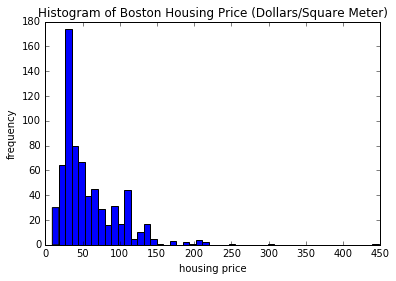

In [23]:
plt.hist(y,bins=50)
plt.xlabel('housing price')
plt.ylabel('frequency')
plt.title('Histogram of Boston Housing Price (Dollars/Square Meter)')

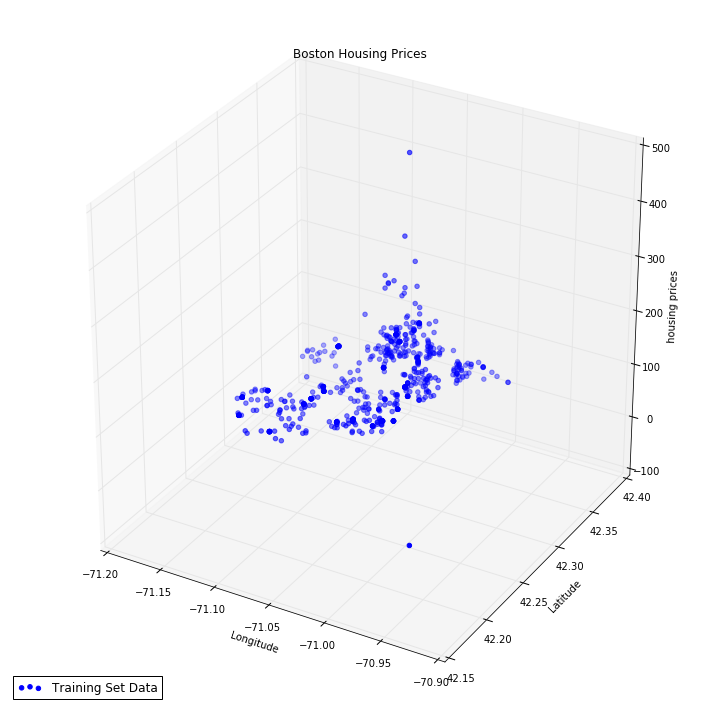

In [24]:
# plotting boston data
fig = plt.figure(figsize=(30,10))

#Project onto axes: 1, 2, 3
ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(data['longitude'], data['latitude'],y, color='b', label='Training Set Data')

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('housing prices')
ax1.set_title('Boston Housing Prices')
ax1.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [25]:
data = data.drop('pixelGrass',axis = 1) 
data = data.drop('pixelFence',axis = 1) 
data['pixelRiver'] = data['pixelRiver'] + data['pixelLake'] +data['pixelSea']
data.rename(columns={'pixelRiver':'pixelWater'}, inplace=True)
data = data.drop('pixelLake',1)
data = data.drop('pixelSea',1)

x = data.values

<function matplotlib.pyplot.show>

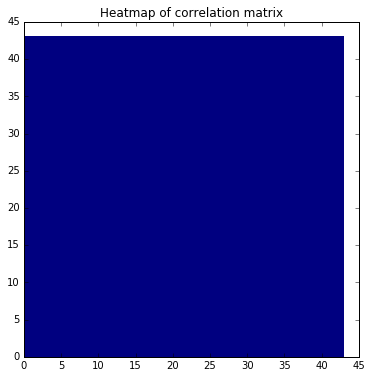

In [26]:
# checking correlation among all the features , doesn't seem like they are correlated 
corr_matrix = np.corrcoef(x.T)
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.pcolor(corr_matrix)
ax.set_title('Heatmap of correlation matrix')
plt.show

In [27]:
data.columns

Index([u'pixelPlant', u'pixelPole', u'pixelRoad', u'pixelWall', u'pixelCar',
       u'numCraigslistHouse', u'pixelWater', u'pixelBus', u'pixelCeiling',
       u'pixelPath', u'pixelBuilding', u'crime', u'walkSchool', u'walkMbta',
       u'energySiteEUI', u'pixelPerson', u'pixelTree', u'pixelVan',
       u'walkPark', u'walkUniversity', u'pixelSidewalk', u'pixelGround',
       u'pixelMountain', u'pixelPalmTree', u'pixelHouse', u'pixelBridge',
       u'pixelSign', u'pixelRailing', u'pixelField', u'pixelWindow',
       u'pixelGrandstand', u'numCraigslistRoom', u'pixelSky', u'longitude',
       u'latitude', u'bathrooms', u'last_sold_price', u'property_size', u'zip',
       u'status', u'bedrooms', u'year_built', u'home_type'],
      dtype='object')

In [28]:
print data.columns.shape
len(data.columns)

(43L,)


43

C:\Users\gujianflsgj\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


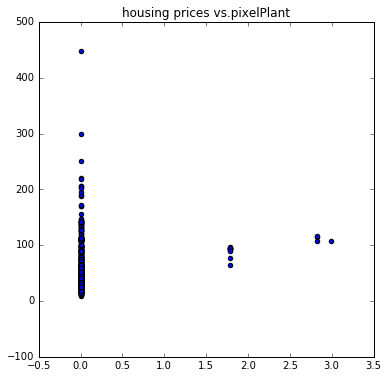

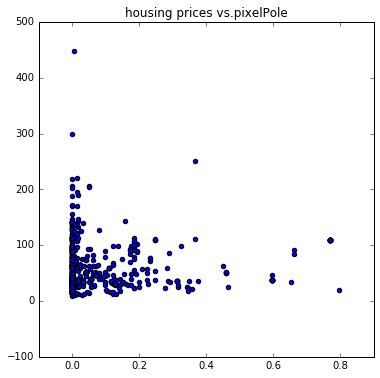

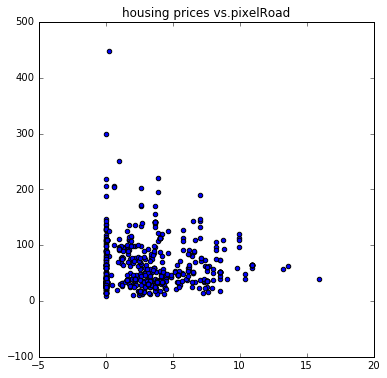

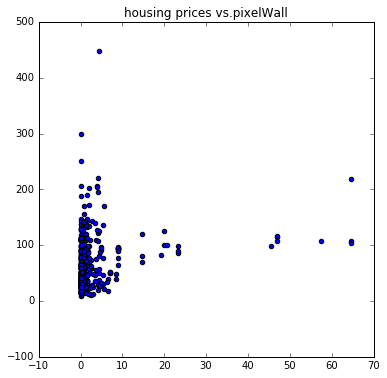

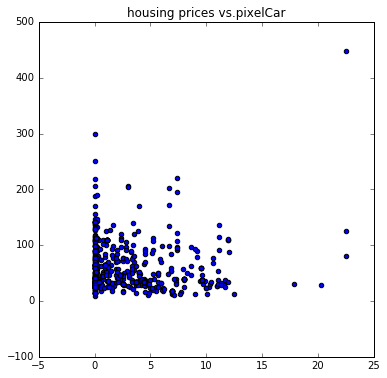

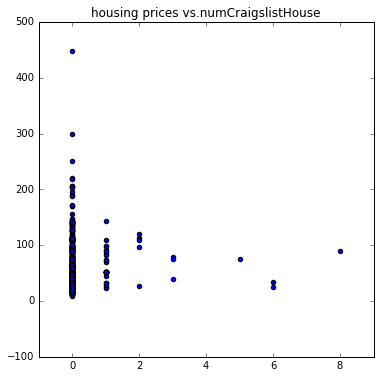

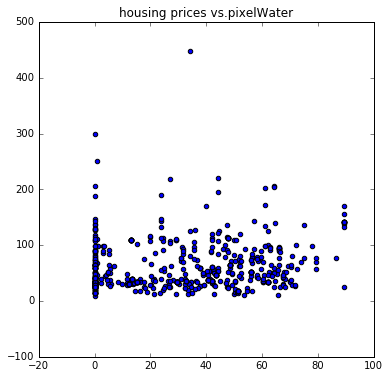

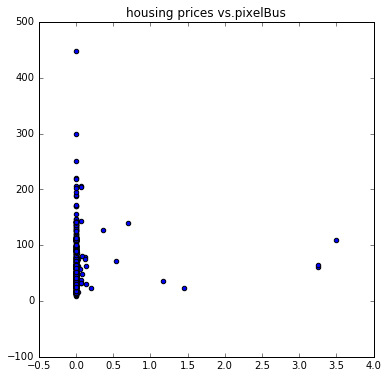

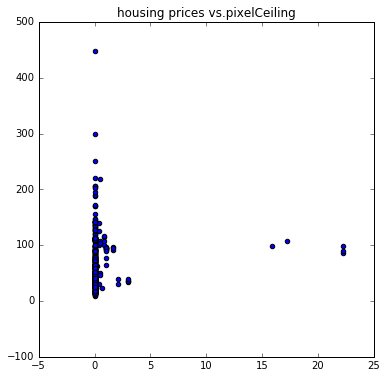

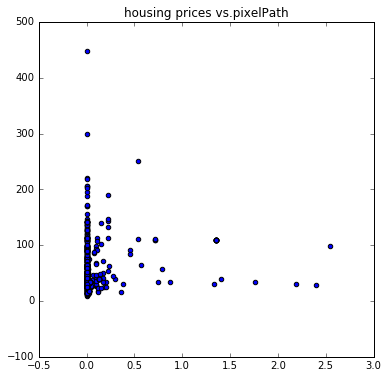

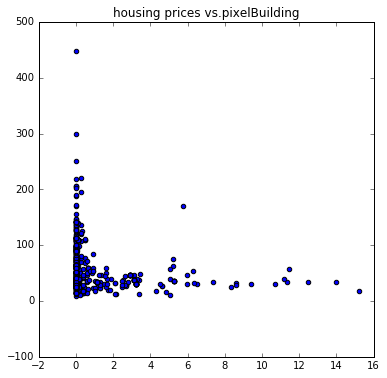

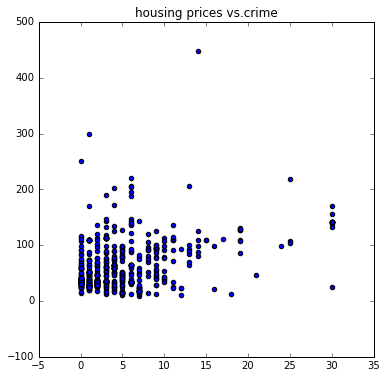

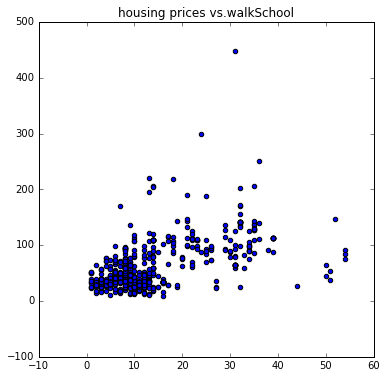

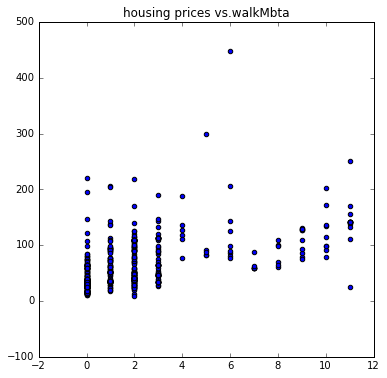

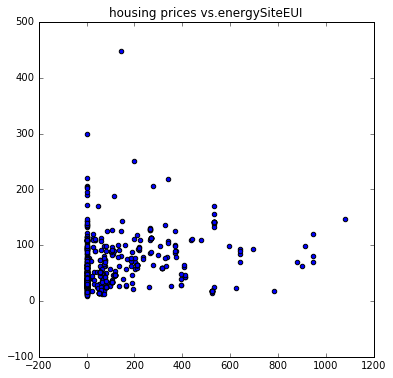

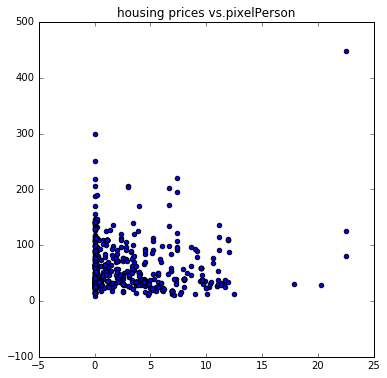

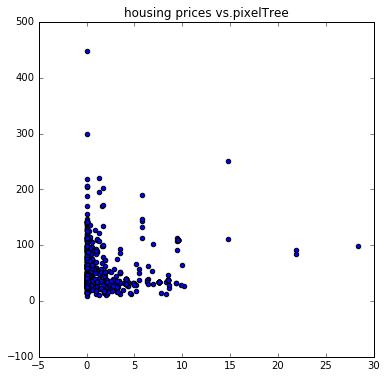

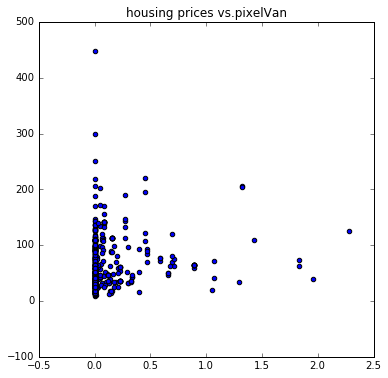

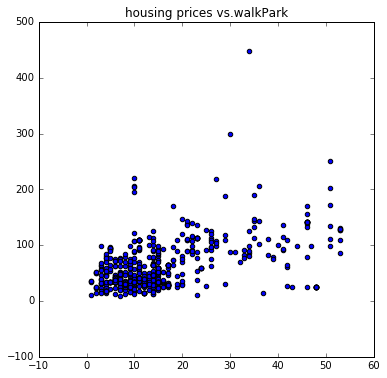

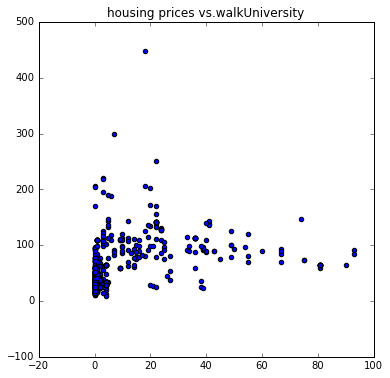

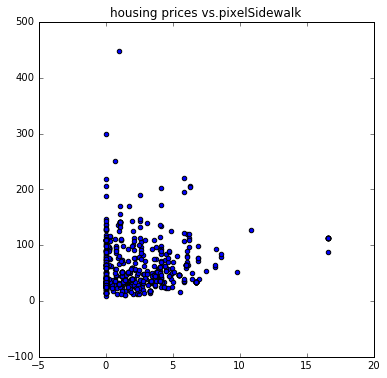

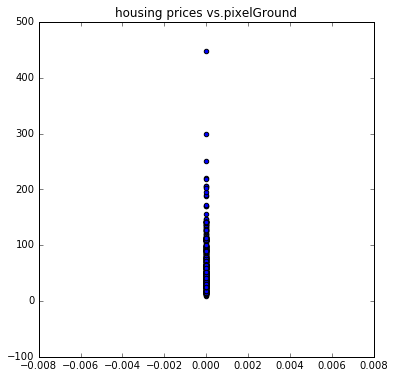

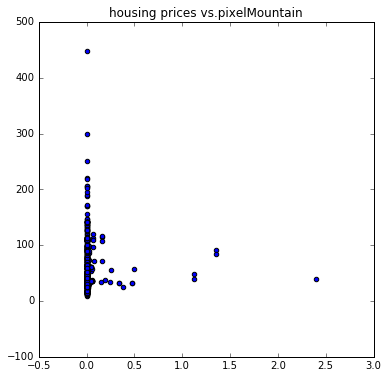

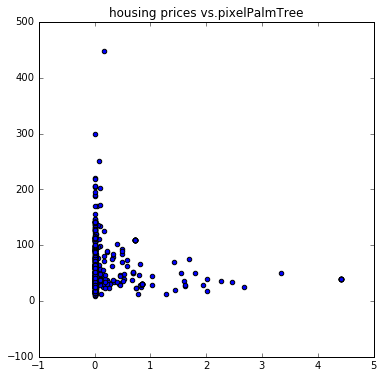

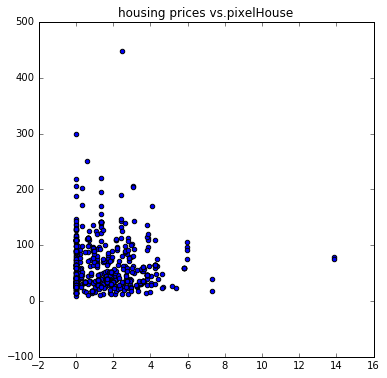

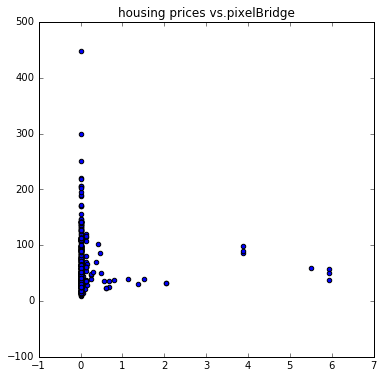

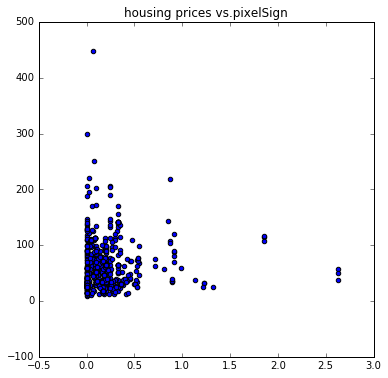

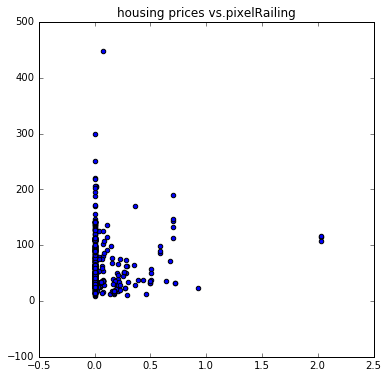

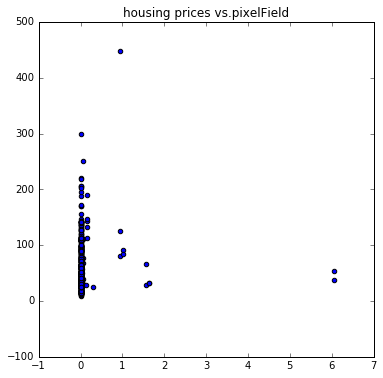

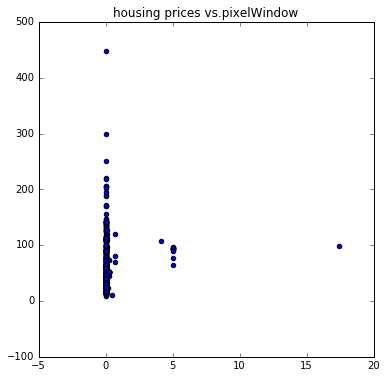

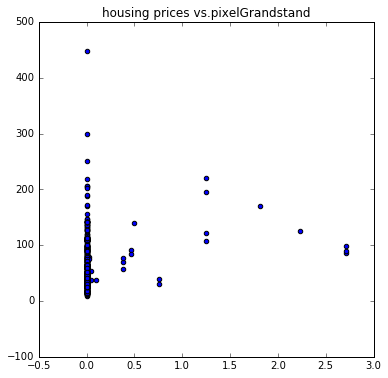

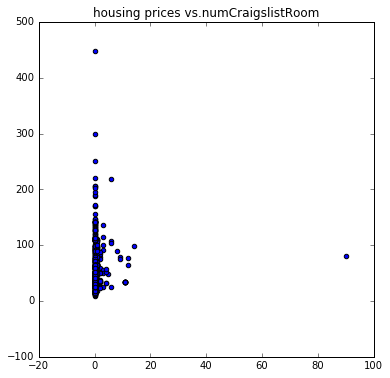

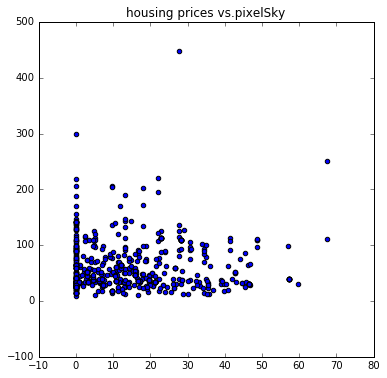

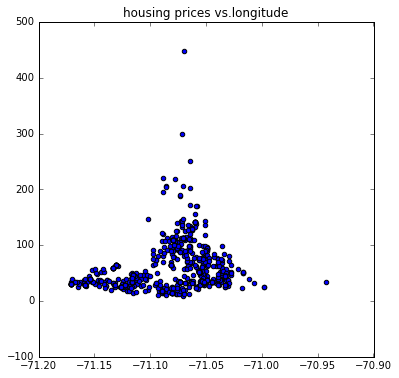

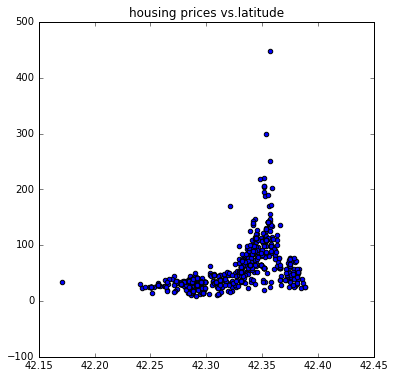

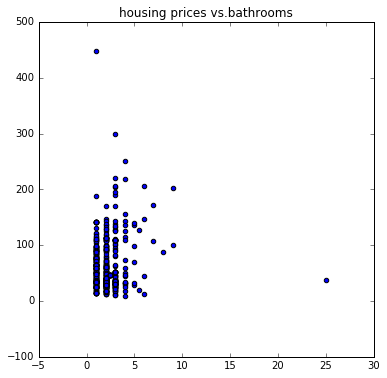

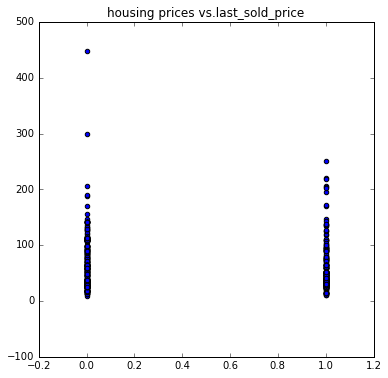

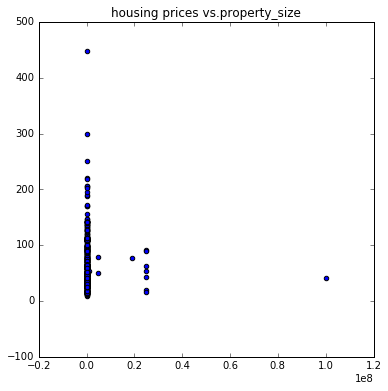

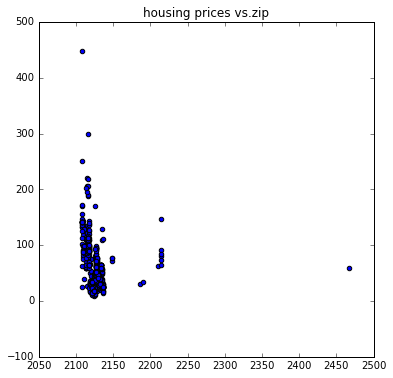

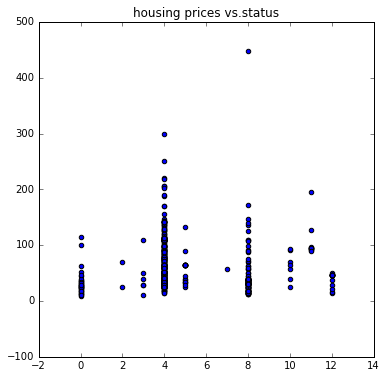

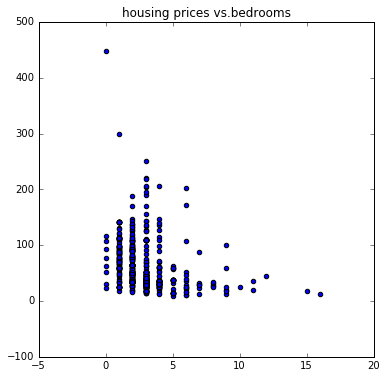

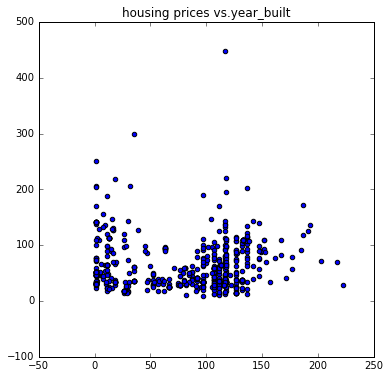

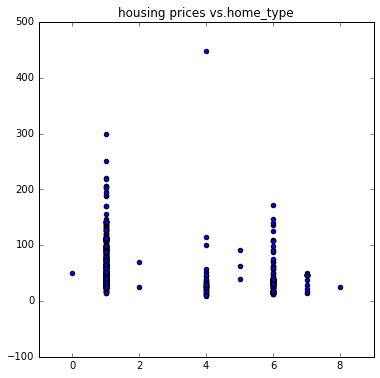

In [29]:
for i in range(len(data.columns)):
                         
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    ax.scatter(data[data.columns[i]],y)
    ax.set_title('housing prices vs.'+data.columns[i])
    ax1.set_xlim([-0.1,1])
    plt.savefig("pic%d"%i, transparent = True)



In [30]:
min_bic = 1e10 # set some initial large value for min BIC score
best_subset = [] # best subset of predictors

# Create all possible subsets of the set of 10 predictors
predictor_set = set(range(15)) # predictor set = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Repeat for every possible size of subset
for size_k in range(15): 
    # Create all possible subsets of size 'size', 
    # using the 'combination' function from the 'itertools' library
    subsets_of_size_k = it.combinations(predictor_set, size_k + 1) 
    
    max_r_squared = -1e10 # set some initial small value for max R^2 score
    best_k_subset = [] # best subset of predictors of size k
    
    # Iterate over all subsets of our predictor set
    for predictor_subset in subsets_of_size_k:    
        # Use only a subset of predictors in the training data
        x_subset = x[:, predictor_subset]
        # Add a column of ones
        x_subset = np.hstack((x_subset, np.ones((x_subset.shape[0], 1))))
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset 
        # we've found so far, remember the current predictor subset as the best!
        if(r_squared > max_r_squared): 
            max_r_squared = r_squared
            best_k_subset = predictor_subset[:]
                

    # Use only the best subset of size k for the predictors
    x_subset = x[:, best_k_subset]
        
    # Fit and evaluate BIC of the best subset of size k
    model = OLS(y, x_subset)
    results = model.fit()
    bic = results.bic
    
    # Update minimum BIC and best predictor subset
    # If current predictor has a lower BIC score than that of the best subset 
    # we've found so far, remember the current predictor as the best!
    if(bic < min_bic): 
        min_bic = bic
        best_subset = best_k_subset[:]
    
print('Best subset by exhaustive search:')
print sorted(best_subset)
exhaust = sorted(best_subset)
print data.columns.values[sorted(best_subset)]

Best subset by exhaustive search:
[0, 3, 6, 8, 9, 10, 11, 12, 13, 14]
['pixelPlant' 'pixelWall' 'pixelWater' 'pixelCeiling' 'pixelPath'
 'pixelBuilding' 'crime' 'walkSchool' 'walkMbta' 'energySiteEUI']


In [31]:
### Step-wise Forward Selection
d = x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):    
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        # Add a column of ones
        x_subset = np.hstack((x_subset, np.ones((x_subset.shape[0], 1))))
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print 'Step-wise forward subset selection:'
print sorted(best_subset) # add 1 as indices start from 0
forward = data.columns.values[sorted(best_subset)]
print forward

Step-wise forward subset selection:
[3, 8, 9, 12, 13, 14, 18, 25, 29, 30, 34, 35, 40]
['pixelWall' 'pixelCeiling' 'pixelPath' 'walkSchool' 'walkMbta'
 'energySiteEUI' 'walkPark' 'pixelBridge' 'pixelWindow' 'pixelGrandstand'
 'latitude' 'bathrooms' 'bedrooms']


In [32]:
###  Step-wise Backward Selection
d = x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors
current_predictors = range(d)

# First, fit and evaluate BIC using all 'd' number of predictors
model = OLS(y, x)
results = model.fit()
bic_all = results.bic

# Set the minimum BIC score, initially, to the BIC score using all 'd' predictors
global_min_bic = bic_all
# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, d predictors to 1 predictor
for size in range(d - 1, 0, -1): # stop before 0 to avoid choosing an empty set of predictors
    max_r_squared = -1e10 # set some initial small value for max R^2
    worst_predictor = -1 # set some throwaway initial number for the worst predictor to remove
    bic_without_worst_predictor = 1e10 # set some initial large value for min BIC score  
        
    # Iterate over current set of predictors (for potential elimination)
    for i in current_predictors:
        # Create copy of current predictors, and remove predictor 'i'
        temp = current_predictors[:]
        temp.remove(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        # Add a column of ones
        x_subset = np.hstack((x_subset, np.ones((x_subset.shape[0], 1))))
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            worst_predictor = i
            bic_without_worst_predictor = results.bic
          
    # Remove worst predictor from current set of predictors
    current_predictors.remove(worst_predictor)
    
    # Check if BIC for the predictor we just removed is lower than 
    # the global minimum across all subset of predictors
    if(bic_without_worst_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_without_worst_predictor
    
print 'Step-wise backward subset selection:'
print sorted(best_subset)
backward = data.columns.values[sorted(best_subset)]
print backward

Step-wise backward subset selection:
[3, 8, 9, 12, 13, 14, 18, 25, 30, 34, 35, 40]
['pixelWall' 'pixelCeiling' 'pixelPath' 'walkSchool' 'walkMbta'
 'energySiteEUI' 'walkPark' 'pixelBridge' 'pixelGrandstand' 'latitude'
 'bathrooms' 'bedrooms']


In [33]:
data.columns.values[sorted(best_subset)]

array(['pixelWall', 'pixelCeiling', 'pixelPath', 'walkSchool', 'walkMbta',
       'energySiteEUI', 'walkPark', 'pixelBridge', 'pixelGrandstand',
       'latitude', 'bathrooms', 'bedrooms'], dtype=object)

## Using BIC selection criterial with exhaustive search, watking distance , distance to school, bathrooms numbers, latitude , home size, and home type are the releveant features 

In [34]:
# base linear regression 
base=['longitude', 'latitude',
       'bathrooms', 'last_sold_price', 'property_size', 'zip', 'status',
       'bedrooms', 'year_built', 'home_type']
xlinear = data[base].values
n = xlinear.shape[0]
n_train = int(np.round(n * 0.4))

# First 40% train, remaining test
xlinear_train = xlinear[:n_train, :]
y_train = y[:n_train]
xlinear_test = xlinear[n_train:, :]
y_test = y[n_train:]
reg = Lin_Reg() #automatically fits intercept (adds column of one's) for you
reg.fit(xlinear_train, y_train)
ylinearpred = reg.predict(xlinear_test)
train_r_squared_plain = reg.score(xlinear_train, y_train)
test_r_squared_plain = reg.score(xlinear_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain
print reg.coef_

Plain Regression: R^2 score on training set 0.316326357898
Plain Regression: R^2 score on test set 0.390477980533
[ -8.86686784e+01   4.34318178e+02   3.10418622e+00  -6.93186846e+00
  -9.17424434e-07  -2.87754641e-01   2.54193714e+00  -3.32795469e+00
  -2.75095526e-03  -4.95002385e+00]


In [35]:
## regular linear regression 

In [36]:
# Split data into train and test
# First 40% train, remaining test
xlinear = data[backward].values
xlinear_train = xlinear[:n_train, :]
xlinear_test = xlinear[n_train:, :]

In [37]:
x_train = x[:n_train, :]
x_test = x[n_train:, :]

In [38]:
# Fit plain regression on train set, evaluate on train and test sets
reg = Lin_Reg() #automatically fits intercept (adds column of one's) for you
reg.fit(xlinear_train, y_train)
ylinearpred = reg.predict(xlinear_test)
train_r_squared_plain = reg.score(xlinear_train, y_train)
test_r_squared_plain = reg.score(xlinear_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain
print backward
print reg.coef_

Plain Regression: R^2 score on training set 0.554806605344
Plain Regression: R^2 score on test set 0.552280768531
['pixelWall' 'pixelCeiling' 'pixelPath' 'walkSchool' 'walkMbta'
 'energySiteEUI' 'walkPark' 'pixelBridge' 'pixelGrandstand' 'latitude'
 'bathrooms' 'bedrooms']
[  1.66975864e+00  -5.08047923e+00   1.02931553e+01   8.37755472e-01
  -4.70824163e-01  -2.65410930e-03   9.89936107e-01  -9.55759953e+00
   4.06865061e+01   3.34295897e+02   2.07474792e+00  -4.47986540e+00]


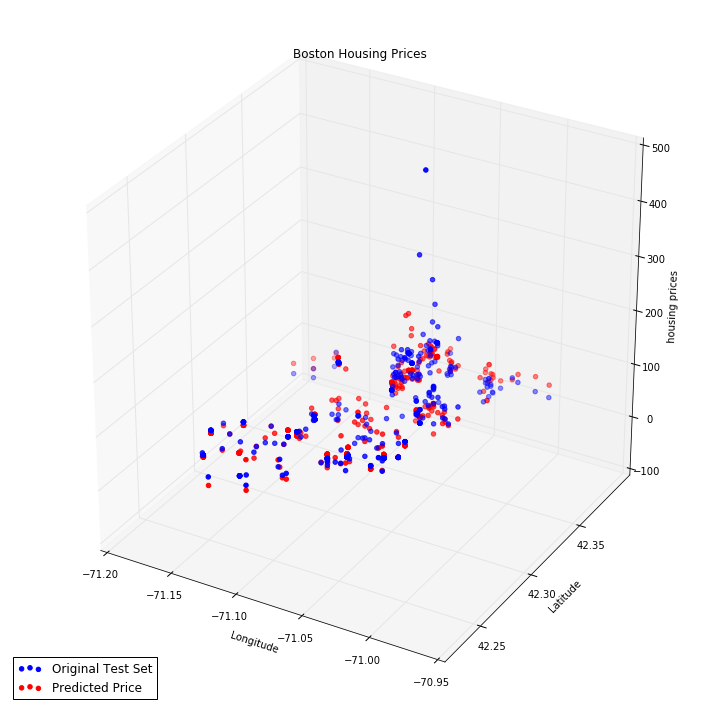

In [39]:
# plotting boston data
fig = plt.figure(figsize=(30,10))

#Project onto axes: 1, 2, 3
ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(data['longitude'][n_train:].values,data['latitude'][n_train:].values,y_test,c='b', color='b',label='Original Test Set')
ax1.scatter(data['longitude'][n_train:],data['latitude'][n_train:],ylinearpred,c='red',color = 'red',label='Predicted Price')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('housing prices')
ax1.set_title('Boston Housing Prices')
ax1.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [40]:
x_std = Standardize(with_mean=False).fit_transform(x)

# Lasso regression
reg = Lasso_Reg(alpha =1)
reg.fit(x_std, y)
coefficients = reg.coef_

print 'Lasso:'
print 'Coefficients:', coefficients
print  'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]
print data.columns.values[[i for i, item in enumerate(coefficients) if abs(item) > 0]]

Lasso:
Coefficients: [  1.78022984   0.76351372  -1.62028417   3.85289307   1.19614439   0.           0.
  -0.16021163  -3.09622089   2.86537383  -0.03692707   1.54431305
   9.99467568   4.29210187  -1.21071298   0.09701096   0.           1.49519728
   6.15427688   0.           0.           0.          -0.23433414   0.          -0.
  -2.08276022  -0.          -0.          -1.34738636   0.19296128
   5.31385155  -0.           0.          -0.          11.50284928
   5.42092042   0.           0.          -0.87417761   1.74624793
  -8.45279138  -0.          -1.42791519]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 22, 25, 28, 29, 30, 34, 35, 38, 39, 40, 42]
['pixelPlant' 'pixelPole' 'pixelRoad' 'pixelWall' 'pixelCar' 'pixelBus'
 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'walkSchool' 'walkMbta'
 'energySiteEUI' 'pixelPerson' 'pixelVan' 'walkPark' 'pixelMountain'
 'pixelBridge' 'pixelField' 'pixelWindow' 'pixelGrandstand' 'latitude'

Lasso Regression: max R^2 score on training set 0.63298542706
Lasso Regression: max R^2 score on test set 0.533951380935


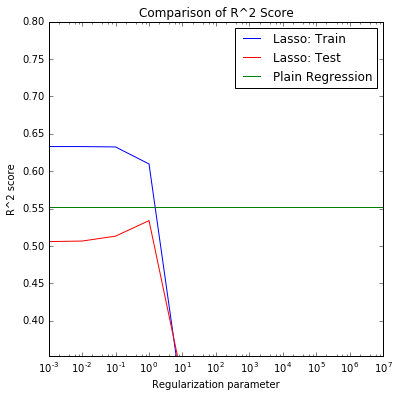

In [48]:
# tune regularizaiton parameters

# Store test R-squared for different regression parameters
max_pow_of_10 = 7 # maximum power of 10
min_pow_of_10 = -3 # minimum power of 10
num_params = max_pow_of_10 - min_pow_of_10 + 1

train_r_squared = []
test_r_squared = []

#standardize x_train and y_train
std = Standardize(with_mean=False)
x_train_std = std.fit_transform(x_train)
x_test_std = x_test / std.scale_ 

for i in range(min_pow_of_10, max_pow_of_10 + 1):    
    # Fit ridge regression on train set
    reg = Lasso_Reg(alpha = 10**i)
    reg.fit(x_train_std, y_train)
        
    # Evaluate train & test performance
    train_r_squared.append(reg.score(x_train_std, y_train))
    test_r_squared.append(reg.score(x_test_std, y_test))
    
# Plot train an test R-squared as a function parameter value
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            train_r_squared, 
            c='b', 
            label='Lasso: Train')
ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            test_r_squared, 
            c='r', 
            label='Lasso: Test')
ax.axhline(y=test_r_squared_plain, 
           c='g', 
           label='Plain Regression')

ax.set_xlabel('Regularization parameter')
ax.set_ylabel('R^2 score')
ax.set_ylim((test_r_squared_plain - 0.2, 0.8))
ax.set_title('Comparison of R^2 Score')
ax.legend(loc='best')

print 'Lasso Regression: max R^2 score on training set', max(train_r_squared)
print 'Lasso Regression: max R^2 score on test set', max(test_r_squared)

plt.show()

In [42]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 10)
reg.fit(x_std, y)
coefficients = reg.coef_

print 'Ridge:'
print 'Coefficients:', coefficients
print 'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Ridge:
Coefficients: [  1.52969298   2.29213497  -2.42188672   5.31383223   1.92563376
   0.54345318  -1.18607724  -0.95832993  -6.82493919   3.53947267
  -1.47858632   2.83548732   9.43789854   5.56754656  -3.96066808
   1.92563376  -1.15601065   1.71357325   6.54673171   0.70230854
   1.9336431    0.          -1.2053437   -0.26665896  -1.47599769
  -3.10929521   1.01643824  -0.56669797  -3.0005008    1.94453138
   8.74845762  -0.14141461   0.2827675   -1.05692459  12.21418469
   6.39028537   0.28957751   0.19573106  -0.7571994    3.56798651
  -8.4690419   -1.03686992  -3.70092368]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


Ridge Regression: max R^2 score on training set 0.6329854815
Ridge Regression: max R^2 score on test set 0.510849003858


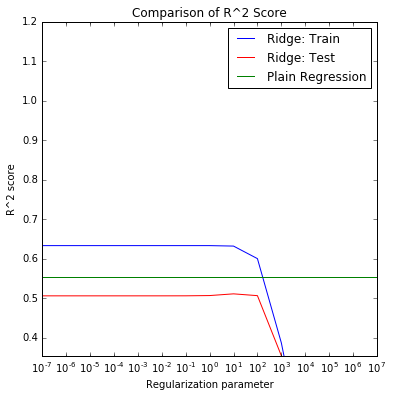

In [43]:
# tune regularizaiton parameters

# Store test R-squared for different regression parameters
max_pow_of_10 = 7 # maximum power of 10
min_pow_of_10 = -7 # minimum power of 10
num_params = max_pow_of_10 - min_pow_of_10 + 1

train_r_squared = []
test_r_squared = []

#standardize x_train and y_train
std = Standardize(with_mean=False)
x_train_std = std.fit_transform(x_train)
x_test_std = x_test / std.scale_ 

for i in range(min_pow_of_10, max_pow_of_10 + 1):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train_std, y_train)
        
    # Evaluate train & test performance
    train_r_squared.append(reg.score(x_train_std, y_train))
    test_r_squared.append(reg.score(x_test_std, y_test))
    
# Plot train an test R-squared as a function parameter value
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            train_r_squared, 
            c='b', 
            label='Ridge: Train')
ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            test_r_squared, 
            c='r', 
            label='Ridge: Test')
ax.axhline(y=test_r_squared_plain, 
           c='g', 
           label='Plain Regression')

ax.set_xlabel('Regularization parameter')
ax.set_ylabel('R^2 score')
ax.set_ylim((test_r_squared_plain - 0.2, 1.2))
ax.set_title('Comparison of R^2 Score')
ax.legend(loc='best')

print 'Ridge Regression: max R^2 score on training set', max(train_r_squared)
print 'Ridge Regression: max R^2 score on test set', max(test_r_squared)

plt.show()

Ridge regression: Test R^2 score for CV choice 0.506296900204
Ridge regression: Max Test R^2 score 0.510849003858
Plain regression: Test R^2 score: 0.552280768531


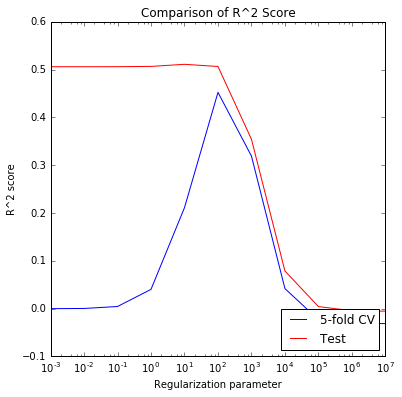

In [44]:
#--------  k_fold_r_squared
# A function for k-fold cross validation with Ridge regression
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
#      num_folds (no. of folds for CV)
#      param_val (regularization parameter value)
# Return: 
#      average R^2 value across folds

def k_fold_r_squared(x_train, y_train, num_folds, param_val):
    n_train = x_train.shape[0]
    n = int(np.round(n_train * 1. / num_folds)) # points per fold

    # Iterate over folds
    cv_r_squared = 0
    
    for fold in range(1, num_folds + 1):
        # Take k-1 folds for training 
        x_first_half = x_train[:n * (fold - 1), :]
        x_second_half = x_train[n * fold + 1:, :]
        x_train_cv = np.concatenate((x_first_half, x_second_half), axis=0)
        
        y_first_half = y_train[:n * (fold - 1)]
        y_second_half = y_train[n * fold + 1:]
        y_train_cv = np.concatenate((y_first_half, y_second_half), axis=0)
        
        # Take the middle fold for testing
        x_test_cv = x_train[1 + n * (fold - 1):n * fold, :]
        y_test_cv = y_train[1 + n * (fold - 1):n * fold]

        # Fit ridge regression model with parameter value on CV train set, and evaluate CV test performance
        reg = Ridge_Reg(alpha = param_val)
        reg.fit(x_train_cv, y_train_cv)
        r_squared = reg.score(x_test_cv, y_test_cv)
    
        # Cummulative R^2 value across folds
        cv_r_squared += r_squared

    # Return average R^2 value across folds
    return cv_r_squared * 1.0 / num_folds

# Store test & CV R^2 values for different regression parameter values
# Range: 10^-7, ... 10^7
max_pow_of_10 = 7
min_pow_of_10 = -3
num_params = max_pow_of_10 - min_pow_of_10 + 1

test_r_squared = []
cv_r_squared = []

# Iterate over various parameter values
for power_of_10 in range(min_pow_of_10, max_pow_of_10+1):
    
    #standardize x_train and y_train
    std = Standardize(with_mean=False)
    x_train_std = std.fit_transform(x_train)
    x_test_std = x_test / std.scale_ 
    
    # Fit regression model on train set, and evaluate test R^2
    reg = Ridge_Reg(alpha=10**power_of_10)
    reg.fit(x_train_std, y_train)
    test_r_squared.append(reg.score(x_test_std, y_test))
    
    # Evaluate 5-fold CV R^2
    cv_r_squared.append(k_fold_r_squared(x_train_std, y_train, 5, 10**power_of_10))

# Plot CV and test R^2 values as a function of parameter value
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            cv_r_squared, 
            c='b', 
            label='5-fold CV')
ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            test_r_squared, 
            c='r', 
            label='Test')

ax.set_xlabel('Regularization parameter')
ax.set_ylabel('R^2 score')
ax.set_title('Comparison of R^2 Score')
ax.legend(loc='lower right')

# Best CV parameter value
best_cv_param = np.argmax(cv_r_squared)

# Print R^2 for best CV parameter, max R^2 across all parameters, and R^2 for plain regression
print 'Ridge regression: Test R^2 score for CV choice', test_r_squared[best_cv_param]
print 'Ridge regression: Max Test R^2 score', max(test_r_squared)
print 'Plain regression: Test R^2 score:', test_r_squared_plain

plt.show()

## Tree

In [45]:
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from IPython.display import Image
#import pydotplus



from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree

C:\Users\gujianflsgj\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth =5
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(x_train, y_train)
y_rf = regr_rf.predict(x_test)

score = regr_rf.score(x_test,y_test)
print score

0.585502733075


In [47]:
pip install treeinterpreter

SyntaxError: invalid syntax (<ipython-input-47-bb672e80005b>, line 1)

In [ ]:
_get_tree_paths(regr_rf,3, depth=5)

In [ ]:
# class sklearn.ensemble.ExtraTreesRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=False, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)[source]¶
import sklearn.BaseForest as regr_rf
# from sklearn.ensemble import regr_rf

# regr_rf.decision_path(x_train)

#regr_rf.decision_path(x_train)

BaseForest

# decision_path


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# COLOR STUFF 
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [ ]:
# A generic function to do CV
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clf.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)
    
# This function creates images of tree models using pydotplus
# https://github.com/JWarmenhoven/ISLR-python
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

# Print decision tree model 'dt'
def display_dt(dt):
    dummy_io = StringIO.StringIO() 
    tree.export_graphviz(dt, out_file = dummy_io, proportion=True) 
    print dummy_io.getvalue()


# Tree interpreter

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, _tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from distutils.version import LooseVersion
import sklearn
if LooseVersion(sklearn.__version__) < LooseVersion("0.17"):
    raise Exception("treeinterpreter requires scikit-learn 0.17 or later")


def _get_tree_paths(tree, node_id, depth=0):
    """
    Returns all paths through the tree as list of node_ids
    """
    if node_id == _tree.TREE_LEAF:
        raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child != _tree.TREE_LEAF:
        left_paths = _get_tree_paths(tree, left_child, depth=depth + 1)
        right_paths = _get_tree_paths(tree, right_child, depth=depth + 1)

        for path in left_paths:
            path.append(node_id)
        for path in right_paths:
            path.append(node_id)
        paths = left_paths + right_paths
    else:
        paths = [[node_id]]
    return paths


def _predict_tree(model, X, joint_contribution=False):
    """
    For a given DecisionTreeRegressor or DecisionTreeClassifier,
    returns a triple of [prediction, bias and feature_contributions], such
    that prediction ≈ bias + feature_contributions.
    """
    leaves = model.apply(X)
    paths = _get_tree_paths(model.tree_, 0)

    for path in paths:
        path.reverse()

    leaf_to_path = {}
    #map leaves to paths
    for path in paths:
        leaf_to_path[path[-1]] = path         
    
    # remove the single-dimensional inner arrays
    values = model.tree_.value.squeeze()
    # reshape if squeezed into a single float
    if len(values.shape) == 0:
        values = np.array([values])
    if type(model) == DecisionTreeRegressor:
        biases = np.full(X.shape[0], values[paths[0][0]])
        line_shape = X.shape[1]
    elif type(model) == DecisionTreeClassifier:
        # scikit stores category counts, we turn them into probabilities
        normalizer = values.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        values /= normalizer

        biases = np.tile(values[paths[0][0]], (X.shape[0], 1))
        line_shape = (X.shape[1], model.n_classes_)
    direct_prediction = values[leaves]
    
    
    #make into python list, accessing values will be faster
    values_list = list(values)
    feature_index = list(model.tree_.feature)
    
    contributions = []
    if joint_contribution:
        for row, leaf in enumerate(leaves):
            path = leaf_to_path[leaf]
            
            
            path_features = set()
            contributions.append({})
            for i in range(len(path) - 1):
                path_features.add(feature_index[path[i]])
                contrib = values_list[path[i+1]] - \
                         values_list[path[i]]
                #path_features.sort()
                contributions[row][tuple(sorted(path_features))] = \
                    contributions[row].get(tuple(sorted(path_features)), 0) + contrib
        return direct_prediction, biases, contributions
        
    else:

        for row, leaf in enumerate(leaves):
            for path in paths:
                if leaf == path[-1]:
                    break
            
            contribs = np.zeros(line_shape)
            for i in range(len(path) - 1):
                
                contrib = values_list[path[i+1]] - \
                         values_list[path[i]]
                contribs[feature_index[path[i]]] += contrib
            contributions.append(contribs)
    
        return direct_prediction, biases, np.array(contributions)


def _predict_forest(model, X, joint_contribution=False):
    """
    For a given RandomForestRegressor or RandomForestClassifier,
    returns a triple of [prediction, bias and feature_contributions], such
    that prediction ≈ bias + feature_contributions.
    """
    biases = []
    contributions = []
    predictions = []

    
    if joint_contribution:
        
        for tree in model.estimators_:
            pred, bias, contribution = _predict_tree(tree, X, joint_contribution=joint_contribution)

            biases.append(bias)
            contributions.append(contribution)
            predictions.append(pred)
        
        
        total_contributions = []
        
        for i in range(len(X)):
            contr = {}
            for j, dct in enumerate(contributions):
                for k in set(dct[i]).union(set(contr.keys())):
                    contr[k] = (contr.get(k, 0)*j + dct[i].get(k,0) ) / (j+1)

            total_contributions.append(contr)    
            
        for i, item in enumerate(contribution):
            total_contributions[i]
            sm = sum([v for v in contribution[i].values()])
                

        
        return (np.mean(predictions, axis=0), np.mean(biases, axis=0),
            total_contributions)
    else:
        for tree in model.estimators_:
            pred, bias, contribution = _predict_tree(tree, X)

            biases.append(bias)
            contributions.append(contribution)
            predictions.append(pred)
        
        
        return (np.mean(predictions, axis=0), np.mean(biases, axis=0),
            np.mean(contributions, axis=0))


def predict(model, X, joint_contribution=False):
    """ Returns a triple (prediction, bias, feature_contributions), such
    that prediction ≈ bias + feature_contributions.
    Parameters
    ----------
    model : DecisionTreeRegressor, DecisionTreeClassifier or
        RandomForestRegressor, RandomForestClassifier
    Scikit-learn model on which the prediction should be decomposed.
    X : array-like, shape = (n_samples, n_features)
    Test samples.
    
    joint_contribution : boolean
    Specifies if contributions are given individually from each feature,
    or jointly over them
    Returns
    -------
    decomposed prediction : triple of
    * prediction, shape = (n_samples) for regression and (n_samples, n_classes)
        for classification
    * bias, shape = (n_samples) for regression and (n_samples, n_classes) for
        classification
    * contributions, If joint_contribution is False then returns and  array of 
        shape = (n_samples, n_features) for regression or
        shape = (n_samples, n_features, n_classes) for classification, denoting
        contribution from each feature.
        If joint_contribution is True, then shape is array of size n_samples,
        where each array element is a dict from a tuple of feature indices to
        to a value denoting the contribution from that feature tuple.
    """
    # Only single out response variable supported,
    if model.n_outputs_ > 1:
        raise ValueError("Multilabel classification trees not supported")

    if (type(model) == DecisionTreeRegressor or
        type(model) == DecisionTreeClassifier):
        return _predict_tree(model, X, joint_contribution=joint_contribution)
    elif (type(model) == RandomForestRegressor or
          type(model) == RandomForestClassifier):
        return _predict_forest(model, X, joint_contribution=joint_contribution)
    else:
        raise ValueError("Wrong model type. Base learner needs to be \
            DecisionTreeClassifier or DecisionTreeRegressor.")